In [ ]:
9.	Используйте данные о температуре в разных городах и создайте модель регрессии для прогнозирования температуры в будущем.

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

import datetime

In [378]:
df = pd.read_csv('city_temperature.csv', low_memory=False)
df = df.query(("City == 'Minsk'") )[['Country','City','Month','Day','Year','AvgTemperature']]

#Заполняем пропущенные значения средними значениями
df['AvgTemperature'] = df['AvgTemperature'].replace(-99.0, df['AvgTemperature'].mean())
#Добавляем колонку для отображения температуры в градусах Цельсия
df['AvgTemperatureC'] = df.apply(lambda row: (row['AvgTemperature'] - 32) * 5/9, axis=1)
#Добавляем колонку для отображения даты
df['Date'] = df.apply(lambda row: datetime.date(row['Year'],row['Month'],row['Day']), axis=1)

In [379]:
df

,Country,City,Month,Day,Year,AvgTemperature,AvgTemperatureC,Date
641909,Belarus,Minsk,1,1,1995,34.400000,1.333333,1995-01-01
641910,Belarus,Minsk,1,2,1995,30.000000,-1.111111,1995-01-02
641911,Belarus,Minsk,1,3,1995,26.800000,-2.888889,1995-01-03
641912,Belarus,Minsk,1,4,1995,15.300000,-9.277778,1995-01-04
641913,Belarus,Minsk,1,5,1995,8.500000,-13.055556,1995-01-05
...,...,...,...,...,...,...,...,...
651168,Belarus,Minsk,5,7,2020,41.821233,5.456240,2020-05-07
651169,Belarus,Minsk,5,8,2020,46.900000,8.277778,2020-05-08
651170,Belarus,Minsk,5,9,2020,54.600000,12.555556,2020-05-09
651171,Belarus,Minsk,5,10,2020,54.400000,12.444444,2020-05-10


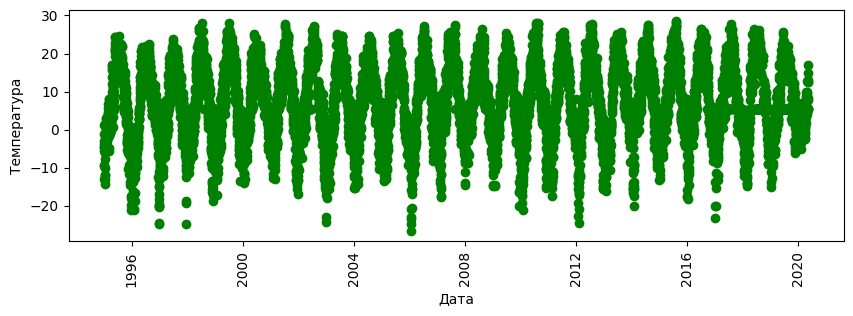

In [380]:
#График
y = df.iloc[0:, [6, 7]]
plt.figure(figsize=(10, 3))
plt.scatter(y['Date'], y['AvgTemperatureC'], c="g")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.xticks(rotation=90)
plt.show()

In [381]:
X = df.iloc[0:, [2,3,4]]
y = df.iloc[0:, 6]

In [382]:
# Разделение данных на обучающий и тестовый наборы
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [383]:
# Нормализация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [384]:
X_train_orig['Date']=X_train_orig.apply(lambda row: datetime.date(row['Year'],row['Month'],row['Day']), axis=1)
X_test_orig['Date']=X_test_orig.apply(lambda row: datetime.date(row['Year'],row['Month'],row['Day']), axis=1)

Mean Squared Error (MSE): 93.62302003987578
R-squared (R2): 0.009780838317847818


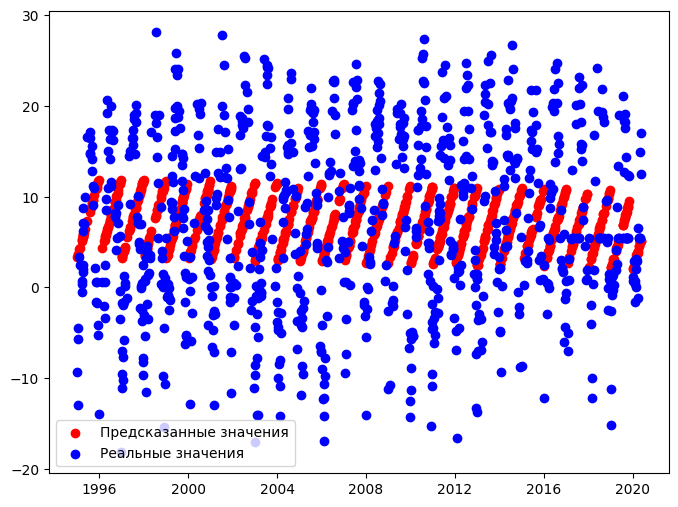

In [385]:
# Обучение модели регрессии (SVR)
model = SVR(kernel='linear', C=1)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)
# Метрики качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_test_orig['Date'], y_pred, c="r")
plt.scatter(X_test_orig['Date'], y_test, c="b")
plt.legend(["Предсказанные значения", "Реальные значения"])
plt.show()

In [386]:
y_test

650463    19.388889
650768     4.166667
645093    16.611111
644422     3.222222
647418    -4.944444
            ...    
643186    19.000000
643629    11.722222
643425    -2.500000
647368    -6.666667
647262    18.166667
Name: AvgTemperatureC, Length: 927, dtype: float64

Mean Squared Error (MSE): 91.8335883893219
R-squared (R2): 0.028707054414532807


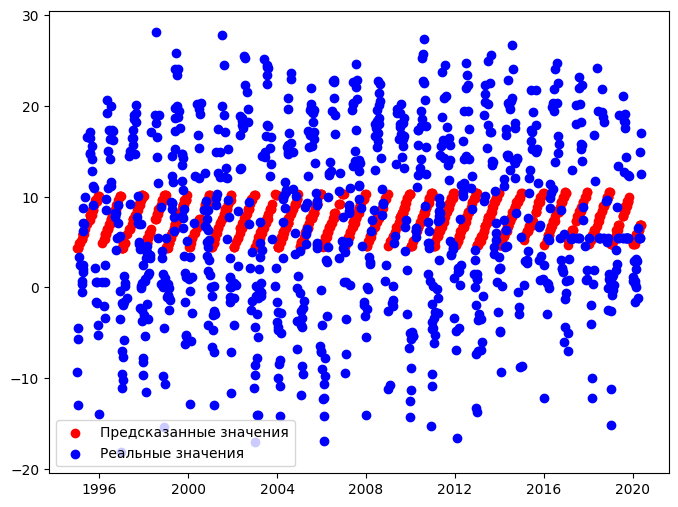

In [387]:
# Обучение модели регрессии (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_test_orig['Date'], y_pred, c="r")
plt.scatter(X_test_orig['Date'], y_test, c="b")
plt.legend(["Предсказанные значения", "Реальные значения"])
plt.show()

Mean Squared Error (MSE): 91.8335292845427
R-squared (R2): 0.028707679545882825


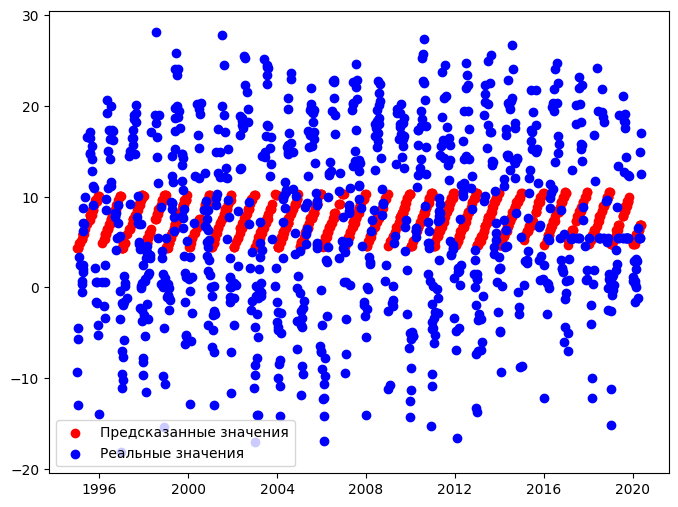

In [388]:
# Обучение модели регрессии (Ridge Regression)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(X_test_orig['Date'], y_pred, c="r")
plt.scatter(X_test_orig['Date'], y_test, c="b")
plt.legend(["Предсказанные значения", "Реальные значения"])
plt.show()

Mean Squared Error (MSE): 20.725662852675875
R-squared (R2): 0.7807916419856727


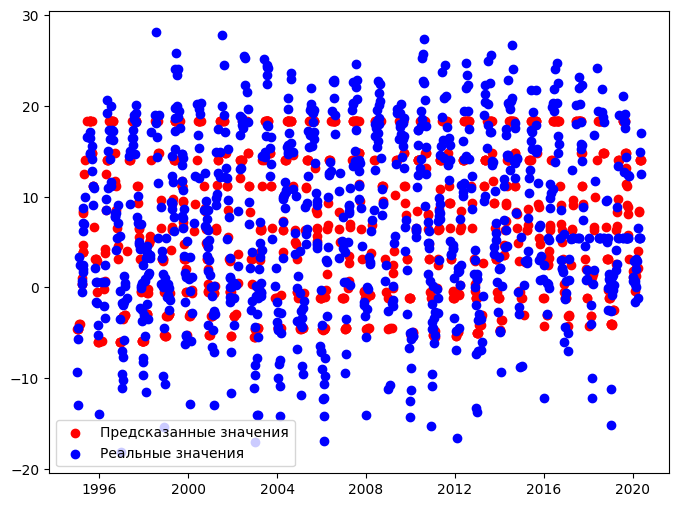

In [389]:
# Обучение модели регрессии (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(X_test_orig['Date'], y_pred, c="r")
plt.scatter(X_test_orig['Date'], y_test, c="b")
plt.legend(["Предсказанные значения", "Реальные значения"])
plt.show()